![Baseball Flights](baseball_flights.png)


To the Office of Transportation at The 22nd Century Sporting League,

After our inaugural 2101 season, The League is looking for ways to optimize our game scheduling process and costs.  We know that transportation logistics are a major variable to consider during scheduling, and as such, we’ve got a few questions for you. 

Our primary areas of focus are surrounding the number of jets that The League needs to own, and the cost of fuel for those flights. If we want The League to enjoy continued success, we'll need to make sure we manage transportation costs.

We’re sharing schedule data for the upcoming 2102 season.  On each row, you’ll find information about which teams are needing to travel to their next set of games, the time the flight will likely depart (based on our estimations of gameplay durations) and the time the flight will likely land. 

Additionally, we're also providing the fuel price that was paid each day during this past 2101 season. The fuel price fluctuates over time, but we're hoping you'll be able to project it to the future to help with the analysis.

## The Data

### team_flights.csv

| Column     | Description              |
|------------|--------------------------|
| `team_name` | Official team name |
| `departure_datetime` | Date and Time (in UTC) when the flight will depart |
| `landing_datetime` | Date and Time (in UTC) when the flight will land |


### fuel_price.csv

| Column     | Description              |
|------------|--------------------------|
| `date` | Date when the fuel price was recorded |
| `fuel_price` | Corresponding fuel price (in $ per gallon) |


### Important Things to Know
- You can assume that the flight's average speed is 500 MPH. (So, as an example, a 2-hour flight would travel 1000 miles)
- You can assume that each team’s jet fills up with fuel equivalent to 1 gallon per mile-of-travel 
- You can assume that the jet is fueled on the day the travel departs (and thus can use the fuel price corresponding to the departure date)

In [22]:
#Here's my thought process:
# we need to understand how many flights are air-bound at given time
# also we need to understand the fuel prices for the future


In [7]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Explore the data
team_flights = pd.read_csv('./team_flights.csv')
fuel_prices = pd.read_csv('./fuel_prices_2101.csv',
                         index_col='date')

team_flights.head()

# Some basic data cleaning and pre-processing
team_flights['departure_datetime'] = pd.to_datetime(team_flights['departure_datetime'])
team_flights['landing_datetime']   = pd.to_datetime(team_flights['landing_datetime'])

fuel_prices.index = pd.DatetimeIndex(fuel_prices.index).to_period('D')
fuel_prices
team_flights

,team_name,departure_datetime,landing_datetime,travel_distance_miles
0,Agile Antelopes,2102-04-06 21:37:00,2102-04-07 00:35:57,1491.250000
1,Agile Antelopes,2102-04-10 23:57:00,2102-04-11 01:35:40,822.222222
2,Agile Antelopes,2102-04-14 00:29:00,2102-04-14 05:02:55,2282.638889
3,Agile Antelopes,2102-04-21 03:31:00,2102-04-21 05:23:09,934.583333
4,Agile Antelopes,2102-04-24 22:23:00,2102-04-25 00:25:50,1023.611111
...,...,...,...,...
1140,Diligent Data Scientists,2102-09-05 01:22:00,2102-09-05 03:14:19,935.972222
1141,Diligent Data Scientists,2102-09-07 23:56:00,2102-09-08 04:26:26,2253.611111
1142,Diligent Data Scientists,2102-09-18 22:20:00,2102-09-18 23:00:50,340.277778
1143,Diligent Data Scientists,2102-09-23 03:37:00,2102-09-23 05:40:32,1029.444444


In [8]:
# Start coding here!
all_datetimes = pd.concat([team_flights['departure_datetime'],team_flights['landing_datetime']])
all_datetimes_sorted = sorted(list(set(all_datetimes)))
in_flight_df = pd.DataFrame({
    'date':all_datetimes_sorted,
    'in_flight':0
})
in_flight_df

,date,in_flight
0,2102-04-03 21:40:00,0
1,2102-04-03 21:52:00,0
2,2102-04-03 22:02:00,0
3,2102-04-03 22:04:00,0
4,2102-04-03 22:19:00,0
...,...,...
1886,2102-09-30 07:12:27,0
1887,2102-09-30 07:16:51,0
1888,2102-09-30 09:28:32,0
1889,2102-10-02 23:22:00,0


In [9]:
for index, flight in team_flights.iterrows():
    in_flight_df.loc[(in_flight_df['date']>= flight['departure_datetime']) &(in_flight_df['date']<=flight['landing_datetime']),'in_flight']+=1

in_flight_df

,date,in_flight
0,2102-04-03 21:40:00,2
1,2102-04-03 21:52:00,3
2,2102-04-03 22:02:00,4
3,2102-04-03 22:04:00,5
4,2102-04-03 22:19:00,6
...,...,...
1886,2102-09-30 07:12:27,3
1887,2102-09-30 07:16:51,2
1888,2102-09-30 09:28:32,1
1889,2102-10-02 23:22:00,1


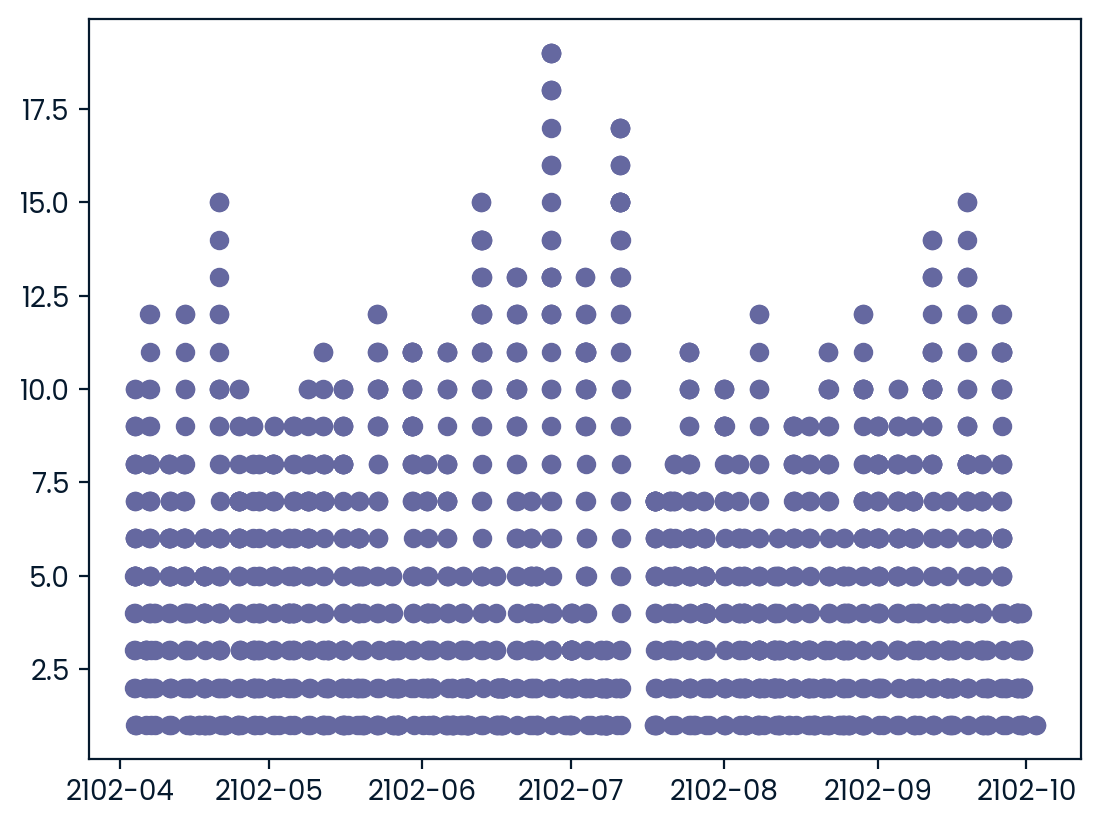

In [10]:
plt.scatter(in_flight_df['date'], in_flight_df['in_flight'])
plt.show()

max_team_in_flight = 19

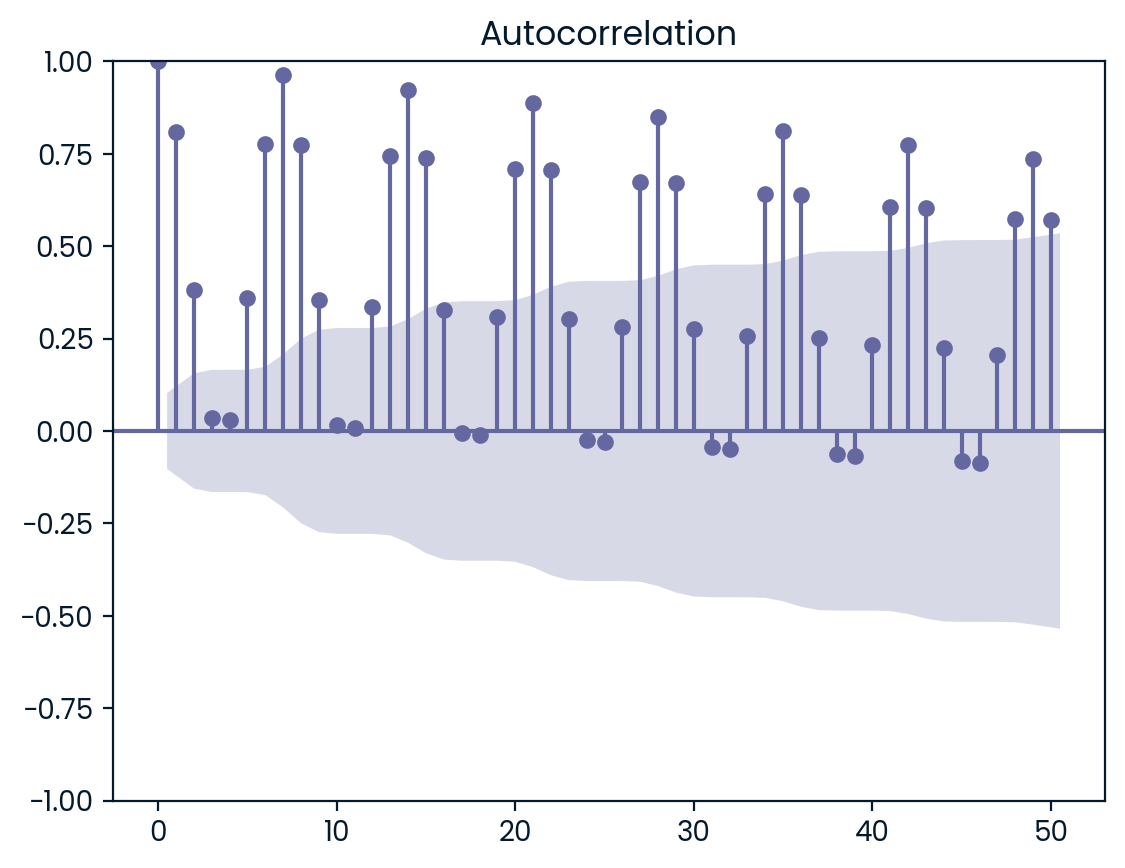

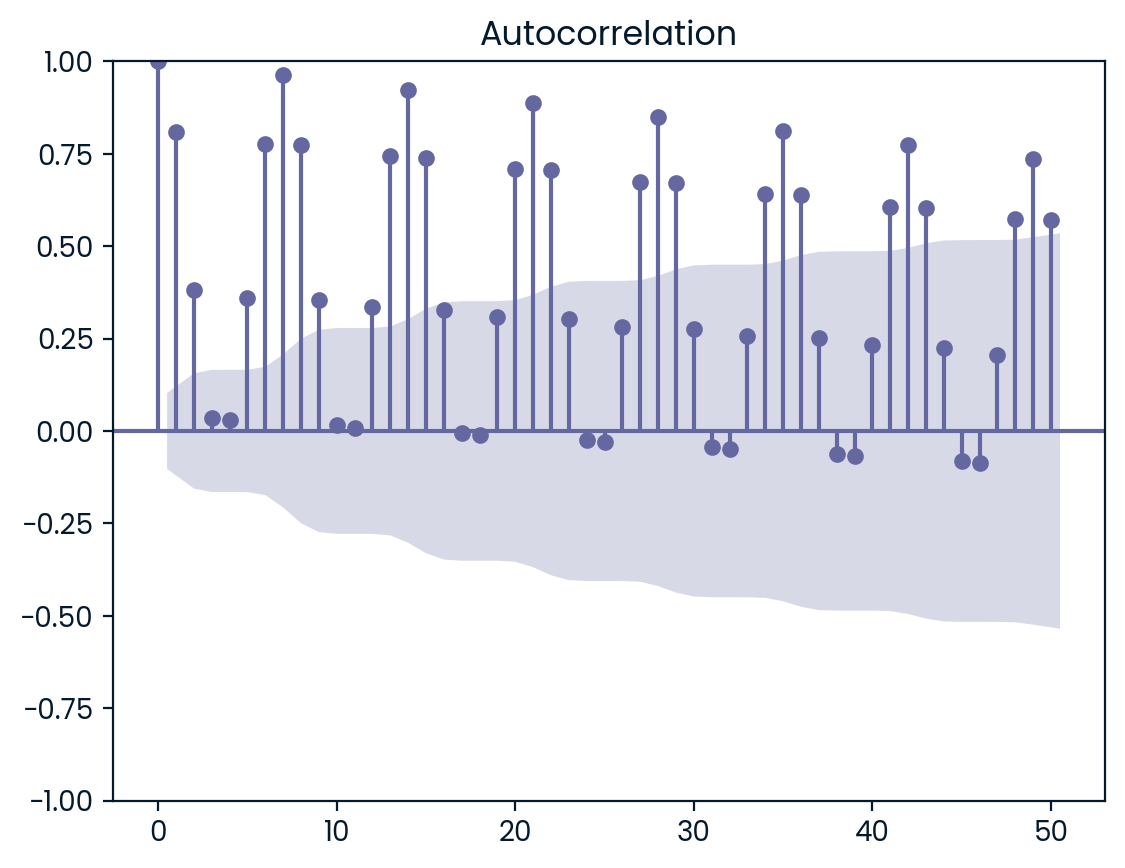

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(fuel_prices, lags=50)

In [16]:
model = SARIMAX(fuel_prices,order = [1,0,1],seasonal_order= [1,0,0,7])

In [30]:
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=365)
fuel_prices_forecast = pd.DataFrame(data={
    "date": forecast.summary_frame().index.to_timestamp(),\
    "price": forecast.predicted_mean.values
})

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59757D+00    |proj g|=  7.08137D+02

At iterate    5    f= -2.52080D+00    |proj g|=  1.76005D+01

At iterate   10    f= -2.71078D+00    |proj g|=  6.62579D-01

At iterate   15    f= -2.71489D+00    |proj g|=  5.55526D+00

At iterate   20    f= -3.81870D+00    |proj g|=  1.06617D+01

At iterate   25    f= -3.82177D+00    |proj g|=  5.62611D+00

At iterate   30    f= -3.82465D+00    |proj g|=  1.49951D+01

At iterate   35    f= -3.84622D+00    |proj g|=  3.41390D+00

At iterate   40    f= -3.84685D+00    |proj g|=  3.83448D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [31]:
#Now we can apply to the flight data
team_flights['departure_date'] = team_flights['departure_datetime'].dt.date

fuel_prices_forecast['date'] = fuel_prices_forecast['date'].dt.date
fuel_prices_forecast.set_index('date',inplace=True)
merged_df = team_flights.join(fuel_prices_forecast,on='departure_date')
merged_df['total_cost'] = merged_df['price']*merged_df['travel_distance_miles']

In [32]:
merged_df

,team_name,departure_datetime,landing_datetime,travel_distance_miles,departure_date,price,total_cost
0,Agile Antelopes,2102-04-06 21:37:00,2102-04-07 00:35:57,1491.250000,2102-04-06,1.569328,2340.261011
1,Agile Antelopes,2102-04-10 23:57:00,2102-04-11 01:35:40,822.222222,2102-04-10,1.295671,1065.329390
2,Agile Antelopes,2102-04-14 00:29:00,2102-04-14 05:02:55,2282.638889,2102-04-14,1.521838,3473.806055
3,Agile Antelopes,2102-04-21 03:31:00,2102-04-21 05:23:09,934.583333,2102-04-21,1.524305,1424.590000
4,Agile Antelopes,2102-04-24 22:23:00,2102-04-25 00:25:50,1023.611111,2102-04-24,1.300863,1331.578205
...,...,...,...,...,...,...,...
1140,Diligent Data Scientists,2102-09-05 01:22:00,2102-09-05 03:14:19,935.972222,2102-09-05,1.423935,1332.764038
1141,Diligent Data Scientists,2102-09-07 23:56:00,2102-09-08 04:26:26,2253.611111,2102-09-07,1.598974,3603.464747
1142,Diligent Data Scientists,2102-09-18 22:20:00,2102-09-18 23:00:50,340.277778,2102-09-18,1.327605,451.754335
1143,Diligent Data Scientists,2102-09-23 03:37:00,2102-09-23 05:40:32,1029.444444,2102-09-23,1.421525,1463.381226


In [33]:
merged_df['total_cost'].sum()

1746409.5218538223